

---

---




▶**TASK-2 : MOVIE RATING PREDICTION**

> Author: THARUN V

> Batch: NOVEMBER

> Domain: Data Science

> Aim: Build a model that predicts the rating of a movie based on
features like genre, director, and actors.


## Importing the Required Library packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

##***Accessing the data files***

#Movies data file

In [ ]:
# Specify the path to your file
file_path = '/content/movies.dat'

# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
moviedata = pd.read_csv(file_path, sep="::", engine='python', encoding=result['encoding'], header=None, names=['MovieID', 'Title', 'Genre'])
moviedata.dropna(inplace=True)
moviedata.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#to check number of columns and rows in the dataframes
moviedata.shape

(3883, 3)

In [ ]:
moviedata.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [ ]:
#information about the data
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
#check the number of missing values in each column
moviedata.isnull().sum()


MovieID    0
Title      0
Genre      0
dtype: int64

#Ratings Data file

In [ ]:
# Specify the path to your file
file_path = '/content/ratings.dat'

# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
ratings = pd.read_csv(file_path, sep="::", engine='python', encoding=result['encoding'], header=None, names=['UserId', 'MovieID' ,	'Ratings', 	'Timestamp'])
ratings.dropna(inplace=True)
ratings.head()

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.shape

(1000209, 4)

In [ ]:
ratings.describe()

,UserId,MovieID,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
ratings.isna().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

#User Data File

In [ ]:
# Specify the path to your file
file_path = '/content/users.dat'

# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
users = pd.read_csv(file_path, sep="::", engine='python', encoding=result['encoding'], header=None, names=['UserId', 'Gender' ,	'Age', 	'Occupation','zipcode'])
users.dropna(inplace=True)
users.head(8)

,UserId,Gender,Age,Occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413


In [ ]:
users.shape

(6040, 5)

In [ ]:
users.describe()

,UserId,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
users.isnull().sum()

UserId        0
Gender        0
Age           0
Occupation    0
zipcode       0
dtype: int64

In [ ]:
users.info

<bound method DataFrame.info of       UserId Gender  Age  Occupation zipcode
0          1      F    1          10   48067
1          2      M   56          16   70072
2          3      M   25          15   55117
3          4      M   45           7   02460
4          5      M   25          20   55455
...      ...    ...  ...         ...     ...
6035    6036      F   25          15   32603
6036    6037      F   45           1   76006
6037    6038      F   56           1   14706
6038    6039      F   45           0   01060
6039    6040      M   25           6   11106

[6040 rows x 5 columns]>

In [ ]:
labelencoder = LabelEncoder()

users['Gender']= labelencoder.fit_transform(users['Gender'])

users.head()

,UserId,Gender,Age,Occupation,zipcode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


#*CONCATENATING THE DATA SETS*

In [ ]:
# Assuming 'Title' is a column in the moviedata DataFrame
data = pd.concat([moviedata, ratings, users], axis=1)

# Ensure that 'MovieID' is used as the key for concatenation
data = pd.merge(pd.merge(ratings, moviedata, on='MovieID'), users, on='UserId')

# Display the resulting DataFrame
print(data.head())


   UserId  MovieID  Ratings  Timestamp  \
0       1     1193        5  978300760   
1       1      661        3  978302109   
2       1      914        3  978301968   
3       1     3408        4  978300275   
4       1     2355        5  978824291   

                                    Title                         Genre  \
0  One Flew Over the Cuckoo's Nest (1975)                         Drama   
1        James and the Giant Peach (1996)  Animation|Children's|Musical   
2                     My Fair Lady (1964)               Musical|Romance   
3                  Erin Brockovich (2000)                         Drama   
4                    Bug's Life, A (1998)   Animation|Children's|Comedy   

   Gender  Age  Occupation zipcode  
0       0    1          10   48067  
1       0    1          10   48067  
2       0    1          10   48067  
3       0    1          10   48067  
4       0    1          10   48067  


In [ ]:
data.shape

(1000209, 10)

#Removing unwanted Columns

In [ ]:
cleardata=data.drop(["Occupation","zipcode","Timestamp"],axis=1)
cleardata.head(7)

,UserId,MovieID,Ratings,Title,Genre,Gender,Age
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,0,1
2,1,914,3,My Fair Lady (1964),Musical|Romance,0,1
3,1,3408,4,Erin Brockovich (2000),Drama,0,1
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,0,1
5,1,1197,3,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,0,1
6,1,1287,5,Ben-Hur (1959),Action|Adventure|Drama,0,1


In [ ]:
cleardata.describe()

,UserId,MovieID,Ratings,Gender,Age
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,7.536115e-01,2.973831e+01
std,1.728413e+03,1.096041e+03,1.117102e+00,4.309076e-01,1.175198e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,1.000000e+00,2.500000e+01
50%,3.070000e+03,1.835000e+03,4.000000e+00,1.000000e+00,2.500000e+01
75%,4.476000e+03,2.770000e+03,4.000000e+00,1.000000e+00,3.500000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.000000e+00,5.600000e+01


In [ ]:
cleardata.isna().sum()

UserId     0
MovieID    0
Ratings    0
Title      0
Genre      0
Gender     0
Age        0
dtype: int64

##Data Visualisation

Text(0.5, 0, 'Ratings')

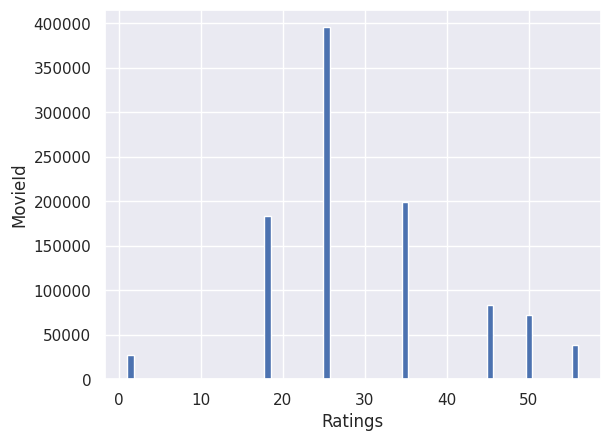

In [ ]:
cleardata.Age.plot.hist(bins=69)
plt.ylabel("MovieId")
plt.xlabel("Ratings")

<Axes: xlabel='Gender', ylabel='count'>

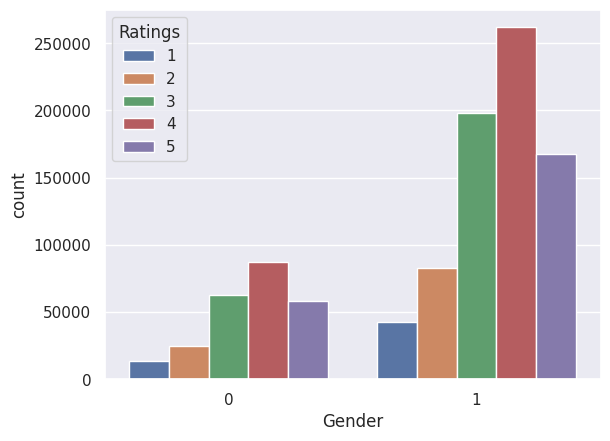

In [ ]:
sns.set()
sns.countplot(x=cleardata['Gender'],hue=cleardata['Ratings'])



Text(0, 0.5, 'Ratings')

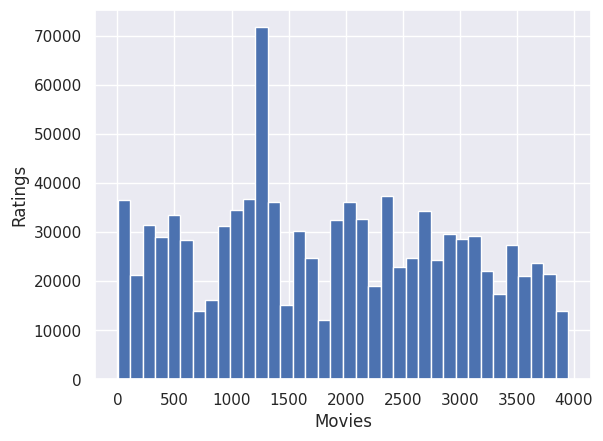

In [ ]:
cleardata['MovieID'].plot.hist(bins=36)
plt.xlabel("Movies")
plt.ylabel("Ratings")

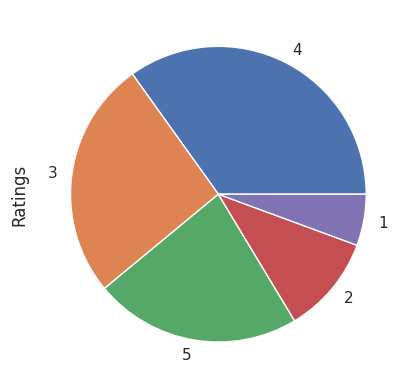

In [ ]:
cleardata['Ratings'].value_counts().plot(kind='pie')
plt.show()


<Axes: xlabel='Age', ylabel='count'>

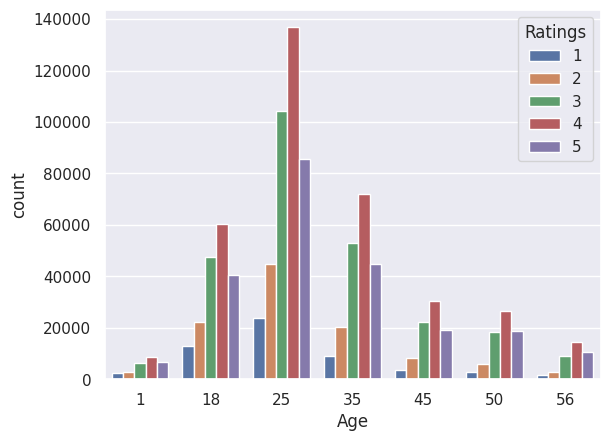

In [ ]:
sns.countplot(x=cleardata['Age'],hue=cleardata['Ratings'])

<Axes: ylabel='Frequency'>

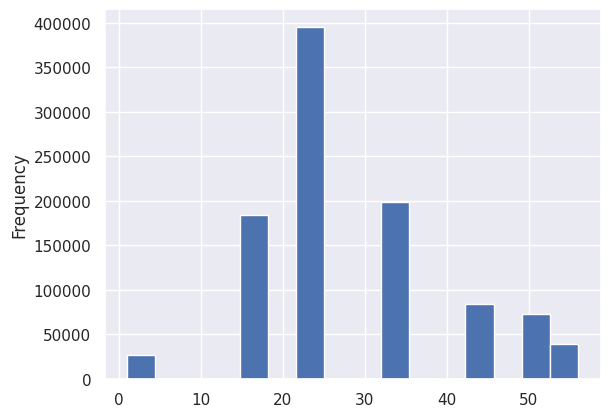

In [ ]:
cleardata['Age'].plot.hist(bins=16)
# plt.xlabel("Ratings")
# plt.ylabel("Age")


##Final Data Set

In [ ]:
cleardata.head(5)

,UserId,MovieID,Ratings,Title,Genre,Gender,Age
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,0,1
2,1,914,3,My Fair Lady (1964),Musical|Romance,0,1
3,1,3408,4,Erin Brockovich (2000),Drama,0,1
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,0,1


In [ ]:
input=cleardata.drop(['Ratings','Title','Genre',], axis=1)
target=cleardata['Ratings']

In [ ]:
target.head()

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

In [ ]:
input.head()

,UserId,MovieID,Gender,Age
0,1,1193,0,1
1,1,661,0,1
2,1,914,0,1
3,1,3408,0,1
4,1,2355,0,1


##Model training and Prediction

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,columns=input.columns)
scaled_df.head()

,UserId,MovieID,Gender,Age
0,0.0,0.301696,0.0,0.0
1,0.0,0.167046,0.0,0.0
2,0.0,0.231081,0.0,0.0
3,0.0,0.862313,0.0,0.0
4,0.0,0.595799,0.0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.5)

print(X_train.shape,X_test.shape)

(500104, 4) (500105, 4)


In [ ]:
print(Y_train)

542960    3
51863     5
717517    4
984088    4
997513    5
         ..
638764    4
182912    4
157658    3
645545    4
563749    5
Name: Ratings, Length: 500104, dtype: int64


In [ ]:
print(Y_test)

730024    4
122791    4
165644    1
276444    2
92471     5
         ..
501482    3
771314    5
136170    3
397792    2
87753     3
Name: Ratings, Length: 500105, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression(max_iter=900)
model.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=900)

In [ ]:
# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

In [ ]:
X_test = np.array(X_test)


#Model Evaluation

In [ ]:
# Evaluate the model
import warnings
warnings.filterwarnings("ignore")

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Display classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.349
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     28052
           2       0.00      0.00      0.00     53559
           3       0.26      0.00      0.00    130548
           4       0.35      1.00      0.52    174601
           5       0.00      0.00      0.00    113345

    accuracy                           0.35    500105
   macro avg       0.12      0.20      0.10    500105
weighted avg       0.19      0.35      0.18    500105

